# Chapter 2

In [2]:
import arviz as az
import numpy as np
import pymc as pm

from matplotlib import pylab as plt
from scipy import stats

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

## Easy

### **2E1** 

Which of the expressions below correspond to the statement: *the probability of rain on Monday?*

1. Pr(rain)
1. Pr(rain|Monday)
1. Pr(Monday|rain)
1. Pr(rain, Monday) / Pr(Monday)  

**Answer**:

* Option 2, Pr(rain|Monday): reads as "the probability of rain, given that the day is Monday".
* Option 4, this is Bayes theorem in action! If you solve it then you will get Pr(rain|Monday) as well.


### 2E2

Which of the follwoing statements correspond to the expression:$Pr(Monday|rain)$?

1. The probability of rain on Monday
1. The probability of rain, given that it is Monday
1. The probability that it is Monday, given that it is raining
1. The probability that it is Monday and that it is raining

**Answer**:

* Option 3, The probability that it is Monday, given that it is raining
* Option 1 and 2: Pr(rain|Monday)
* Option 4: Pr(rain, Monday)



### 2E3

Which of the expressions below correspond to the statement: the probability that it is Monday, given that it is raining?

1. Pr(Monday|rain)
1. Pr(rain|Monday)
1. Pr(rain|Monday) Pr(Monday)
1. Pr(rain|Monday) Pr(Monday)/ Pr(rain)
1. Pr(Monday|rain) Pr(rain)/ Pr(Monday)

**Answer**:

* Option 1
* Option 4

### 2E4

The Bayesian statistician Bruno de Finetti (1906–1985) began his 1973 book on probability theory with the declaration: “PROBABILITY DOES NOT EXIST.” The capitals appeared in the original, so I imagine de Finetti wanted us to shout this statement. What he meant is that probability is a device for describing uncertainty from the perspective of an observer with limited knowledge; it has no objective reality. Discuss the globe tossing example from the chapter, in light of this statement. What does it mean to say “the probability of water is 0.7”?

**Answer**:

Probability quantifies our belief regarding a particular situation, not an objective claim of truth. So, saying that the probability of water on Earth is 0.7 means that if we randomly point a surface of a globe then we will get, for example, 7 water out of 10 trials. However, the probability may change upon seeing new data/samples.

## Medium

### 2M1

Recall the globe tossing model from the chapter. Compute and plot the grid approximate posterior distribution for each of the following sets of observations. In each case, assume a uniform prior for p.

1. W, W, W
1. W, W, W, L
1. L, W, W, L, W, W, W

**Answer**:

In [ ]:
# count the number of waters in each toss
water = np.array([3, 3, 5])

# total number of trials
trials = np.array([3, 4, 7])

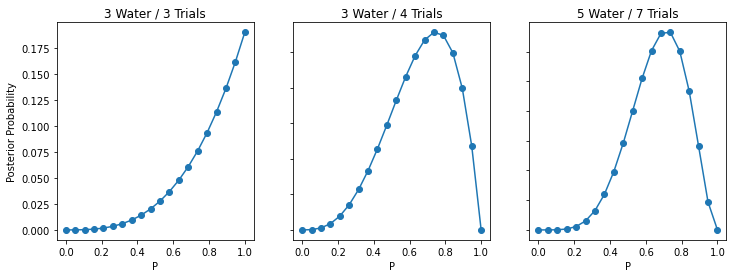

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))

for w, t, ax, ix in zip(water, trials, np.ravel(axs), range(3)):
    # parameter grid
    p_grid = np.linspace(0, 1, 20)

    # compute the likelihood for each value of p, assuming 6 success and 3 fails
    likelihood = stats.binom.pmf(k=w, n=t, p=p_grid)
    
    # uniform prior
    prior = 1
    
    # posterior
    post = likelihood * prior
    
    # normalise the posterior
    post = post / np.sum(post)
    
    # plot
    ax.plot(p_grid, post)
    ax.scatter(p_grid, post)
    ax.set_title(f"{w} Water / {t} Trials")
    ax.set(xlabel="P", ylabel="Posterior Probability")

for ax in axs.flat:
    ax.label_outer()

### 2M2

Now assume a prior for p that is equal to zero when p < 0.5 and is a positive constant when
p ≥ 0.5. Again compute and plot the grid approximate posterior distribution for each of the sets of
observations in the problem just above.

**Answer**:

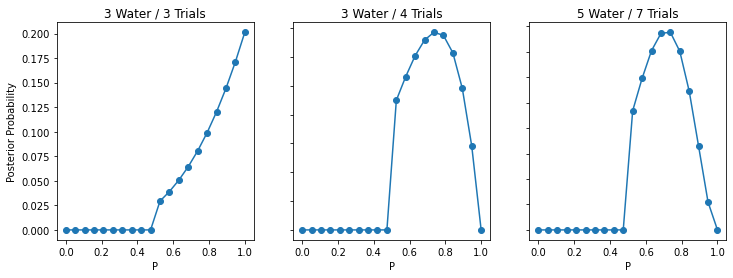

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))

for w, t, ax, ix in zip(water, trials, np.ravel(axs), range(3)):
    p_grid = np.linspace(0, 1, 20)

    # compute the likelihood for each value of p, assuming 6 success and 3 fails
    likelihood = stats.binom.pmf(k=w, n=t, p=p_grid)

    # step function prior
    prior = (p_grid >= 0.5).astype(int)

    # posterior
    post = likelihood * prior
    
    # normalise the posterior
    post = post / np.sum(post)
    
    # plot
    ax.plot(p_grid, post)
    ax.scatter(p_grid, post)
    ax.set_title(f"{w} Water / {t} Trials")
    ax.set(xlabel="P", ylabel="Posterior Probability")

for ax in axs.flat:
    ax.label_outer()

### 2M3

Suppose there are two globes, one for Earth and one for Mars. The Earth globe is 70% covered
in water. The Mars globe is 100% land. Further suppose that one of these globes—you don’t know
which—was tossed in the air and produced a “land” observation. Assume that each globe was equally
likely to be tossed. Show that the posterior probability that the globe was the Earth, conditional on
seeing “land” (Pr(Earth|land)), is 0.23.

**Answer**:

* $P(land|Earth) = 1 - 0.7 = 0.3$
* $P(land|Mars) = 1$
* $P(Earth) = P(Mars) = 0.5$

As we want to know $P(Earth|land)$, then:

$$
P(Earth|land) = \frac{P(land|Earth)~P(Earth)}{P(land)}
$$

We need to get $P(land)$ first, which we can calculate in the following way:

$$
\begin{aligned}
P(land) &= P(land|Earth)~P(Earth)+P(land|Mars)~P(Mars)\\
        &= 0.3 * 0.5 + 1 * 0.5\\
        &= 0.65 
\end{aligned}
$$

We plug the number to the Bayes Theorem equation:

$$P(Earth|land) = \frac{0.3*0.5}{0.65} = 0.23$$

### 2M4

Suppose you have a deck with only three cards. Each card has two sides, and each side is either
black or white. One card has two black sides. The second card has one black and one white side. The
third card has two white sides. Now suppose all three cards are placed in a bag and shuffled. Someone
reaches into the bag and pulls out a card and places it flat on a table. A black side is shown facing up,
but you don’t know the color of the side facing down. Show that the probability that the other side is
also black is 2/3. Use the counting method (Section 2 of the chapter) to approach this problem. This
means counting up the ways that each card could produce the observed data (a black side facing up
on the table).

**Answer**:

### 2M5

Now suppose there are four cards: B/B, B/W, W/W, and another B/B. Again suppose a card is
drawn from the bag and a black side appears face up. Again calculate the probability that the other
side is black.

**Answer**:

### 2M6 

Imagine that black ink is heavy, and so cards with black sides are heavier than cards with white
sides. As a result, it’s less likely that a card with black sides is pulled from the bag. So again assume
there are three cards: B/B, B/W, and W/W. After experimenting a number of times, you conclude that
for every way to pull the B/B card from the bag, there are 2 ways to pull the B/W card and 3 ways to
pull the W/W card. Again suppose that a card is pulled and a black side appears face up. Show that
the probability the other side is black is now 0.5. Use the counting method, as before.

**Answer**:

### 2M7 

Assume again the original card problem, with a single card showing a black side face up. Before
looking at the other side, we draw another card from the bag and lay it face up on the table. The face
that is shown on the new card is white. Show that the probability that the first card, the one showing
a black side, has black on its other side is now 0.75. Use the counting method, if you can. Hint: Treat
this like the sequence of globe tosses, counting all the ways to see each observation, for each possible
first card.

**Answer**:

## Hard

### 2H1

Suppose there are two species of panda bear. Both are equally common in the wild and live in the same places. They look exactly alike and eat the same food, and there is yet no genetic assay capable of telling them apart. They differ however in their family sizes. Species A gives birth to twins 10% of the time, otherwise birthing a single infant. Species B births twins 20% of the time, otherwise birthing singleton infants. Assume these numbers are known with certainty, from many years of field research. 

Now suppose you are managing a captive panda breeding program. You have a new female panda of unknown species, and she has just given birth to twins. What is the probability that her next birth will also be twins?

**Answer:**

:::{.panel-tabset}

#### Analytic

What we know from the question:

* $P(A) = P(B) = 0.5$
* $P(twin|A) = 0.1$
* $P(twin|B) = 0.2$

What we can calculate:

* $P(twin) = P(twin|A) * P(A) + P(twin|B) * P(B) = 0.1 * 0.5 + 0.2 * 0.5 = 0.15$
* $P(A|twin) = P(twin|A) P(A) / P(twin) = 0.1 * 0.5 / 0.15 = 1/3$
* $P(B|twin) = 1 - P(A|twin) = 2/3$

What we need to know $P(twin_2|twin_1)$:

We can calculate probability of producing twin in each species, weighted by the posterior probability of being from either species A or B.

$P(twin_2|twin_1)$ = 1/10 * 1/3 + 2/10 * 2/3 = 1/30 + 4/30 = 1/6

#### Code

In [18]:
p_twin_A = 0.1
p_twin_B = 0.2

# first update: twin birth
likelihood_twins = np.array([p_twin_A, p_twin_B])
prior = np.array([1, 1])
post = prior * likelihood_twins
post = post / post.sum()

# another twin
post[0] * p_twin_A + post[1] * p_twin_B

0.16666666666666666

:::

### 2H2

Recall all the facts from the problem above. Now compute the probability that the panda we have is from species A, assuming we have observed only the first birth and that it was twins.

**Answer**:

This question is asking $P(A|twin)$, which we have already answered: **1/3**

### 2H3

Continuing on from the previous problem, suppose the same panda mother has a second birth and that it is not twins, but a singleton infant. Compute the posterior probability that this panda is species A

**Answer**:

In [12]:
p_twin_A = 0.1
p_twin_B = 0.2

# first update: twin birth
likelihood_twins = np.array([p_twin_A, p_twin_B])
prior = np.array([1, 1])
post = prior * likelihood_twins
post = post / post.sum()

# second update: singleton
likelihood_single = np.array([1 - p_twin_A, 1 - p_twin_B])
prior = post 
post = prior * likelihood_single
post = post / post.sum()
post[0]

0.36000000000000004

### 2H4

A common boast of Bayesian statisticians is that Bayesian inference makes it easy to use all of the data, even if the data are of different types. So suppose now that a veterinarian comes along who has a new genetic test that she claims can identify the species of our mother panda. But the test, like all tests, is imperfect. This is the information you have about the test: • The probability it correctly identifies a species A panda is 0.8. • The probability it correctly identifies a species B panda is 0.65. The vet administers the test to your panda and tells you that the test is positive for species A. First ignore your previous information from the births and compute the posterior probability that your panda is species A. Then redo your calculation, now using the birth data as well.

**Answer**:

:::{.panel-tabset}

#### Analytic

What we know:

* P(+A|A) = 0.8
* P(+A|B) = 1 - 0.65 = 0.35

P(+A) = P(+A|A) P(A) + P(+A|B) P(B) = 0.8 * 0.5 + 0.35 * 0.5 = 0.4 + 0.175 = 0.575

Then we need to know P(A|+A) = P(+A|A) P(A) / P(+) = 0.8 * 0.5 / 0.575 = 0.696

From the birth data, we know:
* P(A) = 0.36
* P(B) = 1 - P(A) = 0.64

P(+A) = 0.8 * 0.36 + 0.35 * 0.64 = 0.512

P(A|+) = 0.8 * 0.36 / 0.512 = 0.5625

#### Code

In [22]:
likelihood_test = np.array([0.8, 0.35])
prior = np.array([1, 1])
post = prior * likelihood_test
post = post / post.sum()
post[0]

0.6956521739130436

In [23]:
p_twin_A = 0.1
p_twin_B = 0.2

likelihood_twin_single = np.array([p_twin_A * (1 - p_twin_A), p_twin_B * (1 - p_twin_B)])
prior = post
post = prior * likelihood_twin_single
post = post / post.sum()
post[0]

0.5625

:::